# Introduction

> Hello👋, in this project i conducted an exploratory analysis of violence against children in the province of North Sumatra from 2017 to 2019. The purposes is to determine opportunities for children by gender who experience violence assuming that the victim is under 18 years of age and has received special services.

> The data used were taken through the official website of SIGA and Dinas Pemberdayaan Perempuan dan Perlindungan Anak of the Northern Sumatran Province from 2017 to 2019. The number of data that was successfully retrieved was 198 rows and 36 columns.





---



# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

Mounted at /content/gdrive


In [2]:
data = pd.read_excel('/content/gdrive/MyDrive/PenulisanIlmiah/kekerasan sumut/dataset siga.xlsx')

In [3]:
print('Jumlah Baris dan Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :\n', data.shape)
print('Jumlah Baris Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 : \n', data.shape[0])
print('Jumlah Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :\n', data.shape[1])

Jumlah Baris dan Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :
 (198, 37)
Jumlah Baris Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 : 
 198
Jumlah Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :
 37


# Data Exploratory Analysis

In [4]:
# show object variable

categorical = [var for var in data.columns if data[var].dtype=='O']
print('Terdapat {} categorical variabel\n'.format(len(categorical)))
print('Variabel categorical adalah:\n', categorical)

# show categorical and numerical variable

numerikal =[]
for num in data.columns:
  if data[num].dtypes == 'int64':
    numerikal.append(num)
print('\nAda {} variabel numerik:\n'.format(len(numerikal)))
print('Variabel numerik adalah:\n', numerikal)

Terdapat 2 categorical variabel

Variabel categorical adalah:
 ['Kabupaten/Kota', 'Jenis Kelamin']

Ada 35 variabel numerik:

Variabel numerik adalah:
 ['Tahun', 'Kekerasan Fisik', 'Kekerasan Psikis', 'Kekerasan Seksual', 'Eksploitasi', 'Trafficking', 'Penelantaran', 'Kekerasan Lainnya', '0-5 tahun', '6-12 tahun', '13-17 tahun', 'Rumah', 'Tempat Bekerja', 'Lingkungan Masyarakat', 'Sekolah', 'Lainnya', 'Fasilitas Umum', 'Orang Tua', 'Keluarga', 'Tetangga', 'Petugas di sekolah (Guru dll)', 'Teman dekat', 'Lainnya.1', 'Na', 'Suami/Istri', 'Majikan', 'Rekan Kerja', 'Pengaduan', 'Kesehatan', 'Bantuan Hukum dan Penegakan', 'Penegakan', 'Rehabilitasi Sosial', 'Pemulangan dan Reintegrasi Sosial', 'Pendampingan Tokoh Agama', 'Mediasi']


In [5]:
print('Ringkasan Data Kekerasan Provinsi Sumatera Utara: \n')
data.info()

Ringkasan Data Kekerasan Provinsi Sumatera Utara: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Tahun                              198 non-null    int64 
 1   Kabupaten/Kota                     198 non-null    object
 2   Kekerasan Fisik                    198 non-null    int64 
 3   Kekerasan Psikis                   198 non-null    int64 
 4   Kekerasan Seksual                  198 non-null    int64 
 5   Eksploitasi                        198 non-null    int64 
 6   Trafficking                        198 non-null    int64 
 7   Penelantaran                       198 non-null    int64 
 8   Kekerasan Lainnya                  198 non-null    int64 
 9   0-5 tahun                          198 non-null    int64 
 10  6-12 tahun                         198 non-null    int64 
 11  13-17 tahun        

In [6]:
print('Statistik Deskriptif Data Kasus Kekerasan Provinsi Sumatera Utara: \n')
desc_data = data.describe()
np.transpose(desc_data)

Statistik Deskriptif Data Kasus Kekerasan Provinsi Sumatera Utara: 



,count,mean,std,min,25%,50%,75%,max
Tahun,198.0,2018.000000,0.818566,2017.0,2017.0,2018.0,2019.00,2019.0
Kekerasan Fisik,198.0,3.494949,4.759972,0.0,0.0,2.0,5.00,23.0
Kekerasan Psikis,198.0,2.924242,6.513502,0.0,0.0,0.0,3.00,50.0
Kekerasan Seksual,198.0,7.459596,11.270819,0.0,0.0,2.0,9.75,57.0
Eksploitasi,198.0,0.065657,0.473385,0.0,0.0,0.0,0.00,5.0
Trafficking,198.0,0.025253,0.186794,0.0,0.0,0.0,0.00,2.0
Penelantaran,198.0,2.287879,6.075076,0.0,0.0,0.0,2.00,48.0
Kekerasan Lainnya,198.0,2.015152,5.799945,0.0,0.0,0.0,1.00,43.0
0-5 tahun,198.0,2.530303,5.929928,0.0,0.0,1.0,2.75,48.0
6-12 tahun,198.0,5.217172,7.388309,0.0,1.0,3.0,6.00,48.0


In [7]:
print('Korelasi dataset: \n')
corr = data.corr(method='pearson')
corr

Korelasi dataset: 



,Tahun,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,...,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Tahun,1.000000,-0.127674,-0.145666,-0.092985,0.170298,0.165992,-0.021436,0.019245,-0.040784,-0.067986,...,0.175863,NaN,0.142780,-0.029207,-0.050149,0.228994,-0.014897,0.036712,0.148259,0.102723
Kekerasan Fisik,-0.127674,1.000000,0.685422,0.384335,0.264847,0.042962,0.540979,0.568430,0.620264,0.641980,...,0.158928,NaN,0.414651,0.385206,0.247471,0.025514,0.237690,-0.063848,0.006579,0.021938
Kekerasan Psikis,-0.145666,0.685422,1.000000,0.403180,0.102045,0.026613,0.473916,0.497192,0.660524,0.627639,...,0.045877,NaN,0.199115,0.232997,0.181796,-0.014264,0.070704,0.048689,0.049673,-0.019405
Kekerasan Seksual,-0.092985,0.384335,0.403180,1.000000,0.082796,0.177703,0.238405,0.302349,0.425150,0.712008,...,-0.066539,NaN,0.574298,0.400359,0.341725,0.122011,0.210908,0.045980,-0.006894,0.154419
Eksploitasi,0.170298,0.264847,0.102045,0.082796,1.000000,0.325589,0.154018,0.506213,0.341960,0.246987,...,0.436181,NaN,0.329391,0.157472,0.272040,0.281081,0.106504,-0.017730,0.008181,-0.011662
Trafficking,0.165992,0.042962,0.026613,0.177703,0.325589,1.000000,0.042767,0.187061,0.129912,0.132096,...,-0.019461,NaN,0.241499,0.198204,0.127953,0.138495,0.157374,-0.029657,0.210152,-0.011367
Penelantaran,-0.021436,0.540979,0.473916,0.238405,0.154018,0.042767,1.000000,0.784885,0.800179,0.653297,...,0.034647,NaN,0.430942,0.371972,0.371152,0.027010,0.482963,0.073203,0.018092,-0.018554
Kekerasan Lainnya,0.019245,0.568430,0.497192,0.302349,0.506213,0.187061,0.784885,1.000000,0.896677,0.716476,...,0.142340,NaN,0.451757,0.308722,0.387365,0.139998,0.357366,0.019116,0.000447,-0.017006
0-5 tahun,-0.040784,0.620264,0.660524,0.425150,0.341960,0.129912,0.800179,0.896677,1.000000,0.799583,...,0.059955,NaN,0.459558,0.378893,0.358858,0.086454,0.341266,0.019910,0.029247,-0.003042
6-12 tahun,-0.067986,0.641980,0.627639,0.712008,0.246987,0.132096,0.653297,0.716476,0.799583,1.000000,...,0.063963,NaN,0.581819,0.439919,0.407376,0.075780,0.351429,0.043581,0.007764,0.151470


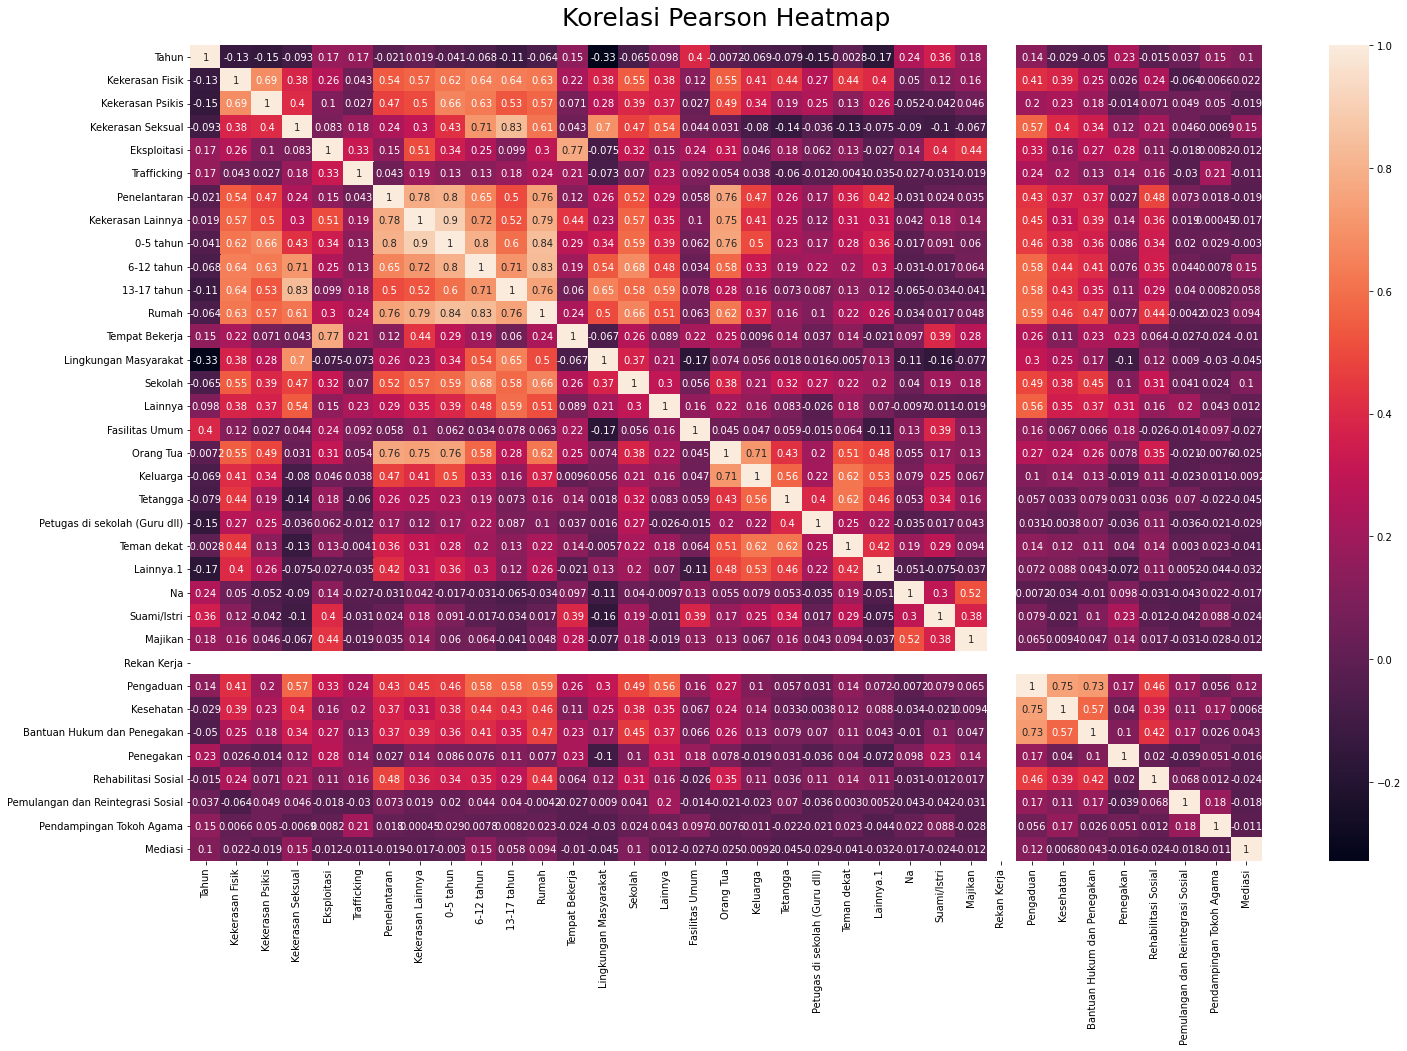

In [8]:
plt.figure(figsize=(24,15))
sns.heatmap(data=corr, annot=True)
plt.title('Korelasi Pearson Heatmap', pad=20, fontsize=25)
plt.savefig('korelasi.png')
plt.show()

In [9]:
print('Mengecek keseimbangan data: \n')
print(data['Jenis Kelamin'].value_counts())

Mengecek keseimbangan data: 

Laki-laki    99
Perempuan    99
Name: Jenis Kelamin, dtype: int64


In [10]:
laki = len(data[data['Jenis Kelamin'] == 'Laki-laki'])
perempuan = len(data[data['Jenis Kelamin'] == 'Perempuan'])

lakipersen = laki/(laki+perempuan)
print('Persentase dari Laki-laki:', lakipersen * 100)

perempuanpersen = perempuan/(laki+perempuan)
print('Persentase dari Perempuan:', perempuanpersen*100)

Persentase dari Laki-laki: 50.0
Persentase dari Perempuan: 50.0


In [11]:
print('rata-rata korban dan pelaku berdasarkan jenis kelamin: \n')
observ = data.copy()
observ.drop(['Tahun'], axis=1, inplace=True)
observ.groupby(['Jenis Kelamin']).mean()

rata-rata korban dan pelaku berdasarkan jenis kelamin: 



,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,...,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Jenis Kelamin,,,,,,,,,,,,,,,,,,,,,
Laki-laki,3.808081,2.080808,1.737374,0.060606,0.000000,2.272727,1.818182,1.797980,3.535354,3.969697,...,0.040404,0.0,6.767677,1.212121,2.666667,0.151515,0.262626,0.373737,0.101010,0.000000
Perempuan,3.181818,3.767677,13.181818,0.070707,0.050505,2.303030,2.212121,3.262626,6.898990,9.505051,...,0.000000,0.0,14.262626,3.121212,6.545455,0.343434,0.444444,0.363636,0.252525,0.191919


In [12]:
print('rata-rata banyaknya kasus berdasarkan tahun:\n')
data.groupby(['Tahun']).mean()

rata-rata banyaknya kasus berdasarkan tahun:



,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,...,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Tahun,,,,,,,,,,,,,,,,,,,,,
2017,4.121212,4.242424,8.333333,0.00000,0.000000,2.000000,1.878788,2.621212,5.454545,7.348485,...,0.000000,0.0,5.575758,1.772727,5.333333,0.000000,0.257576,0.242424,0.030303,0.000000
2018,3.727273,2.606061,8.272727,0.00000,0.000000,3.181818,2.015152,2.939394,5.969697,7.954545,...,0.000000,0.0,14.803030,3.318182,4.712121,0.000000,0.590909,0.469697,0.136364,0.000000
2019,2.636364,1.924242,5.772727,0.19697,0.075758,1.681818,2.151515,2.030303,4.227273,4.909091,...,0.060606,0.0,11.166667,1.409091,3.772727,0.742424,0.212121,0.393939,0.363636,0.287879


In [13]:
datatahun = data.loc[:,'Tahun':'13-17 tahun']
datatahun.drop(['Kabupaten/Kota'], axis=1, inplace=True)
datatahun['Total'] = datatahun.loc[:,'Kekerasan Fisik':'13-17 tahun'].sum(axis=1)
datagroup = datatahun.groupby(['Tahun']).sum().reset_index()
datagroup

,Tahun,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Total
0,2017,272,280,550,0,0,132,124,173,360,485,2376
1,2018,246,172,546,0,0,210,133,194,394,525,2420
2,2019,174,127,381,13,5,111,142,134,279,324,1690


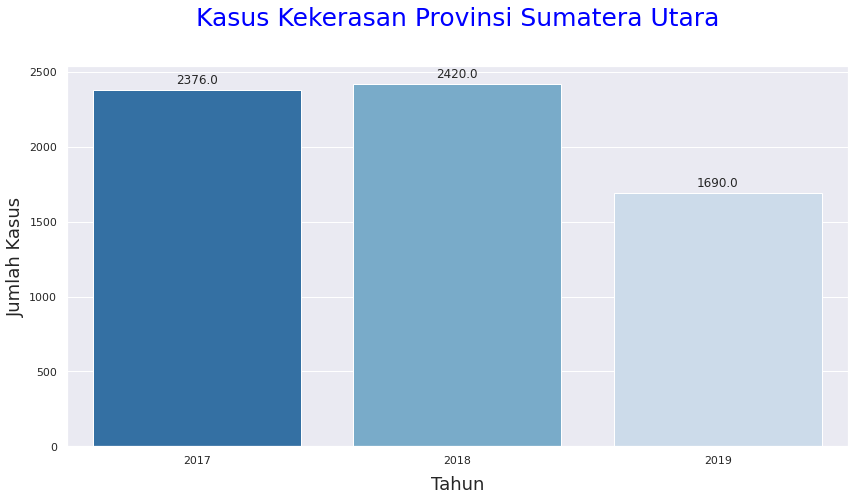

In [14]:
plt.figure(figsize=(14,7))
sns.set()
var = datagroup['Tahun']
num = datagroup['Total']
bars = sns.barplot(x=var,y=num, data = datagroup,palette='Blues_r')

for p in bars.patches:
  bars.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 10), 
               textcoords = 'offset pixels',
               fontsize=12)

plt.xlabel('Tahun', fontsize=18, labelpad=10)
plt.ylabel('Jumlah Kasus', fontsize=18)
plt.title('Kasus Kekerasan Provinsi Sumatera Utara', pad=40, fontsize=25, color='blue')
plt.xticks(rotation=0)
plt.savefig('jumlah kasus berdasrkan tahun.png', bbox_tight=True)
plt.show()

In [15]:
datagroup=data.loc[:,'Tahun':'Kekerasan Lainnya']
datagroup.drop(['Kabupaten/Kota'], axis=1, inplace=True)
datagroup['Total'] = datagroup.loc[:,'Kekerasan Fisik':'Kekerasan Lainnya'].sum(axis=1)
datagrouptahun = datagroup.groupby(['Tahun'])[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Eksploitasi','Trafficking','Penelantaran','Kekerasan Lainnya']].sum()
datagrouptahun

,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya
Tahun,,,,,,,
2017,272,280,550,0,0,132,124
2018,246,172,546,0,0,210,133
2019,174,127,381,13,5,111,142


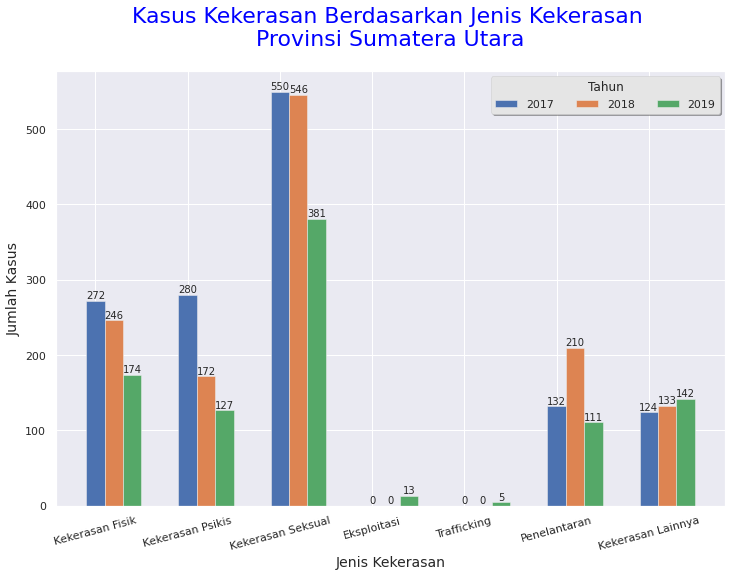

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('ggplot')
labels = ['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual',
          'Eksploitasi','Trafficking','Penelantaran','Kekerasan Lainnya']
x = np.arange(7)
datagroup_tjenis = np.transpose(datagrouptahun)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_tjenis.columns):
  bar = plt.bar(x+(a*width), datagroup_tjenis[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x-0, labels=datagroup_tjenis.index, rotation=15)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Jenis Kekerasan \nProvinsi Sumatera Utara', fontsize=22, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Jenis Kekerasan', fontsize=14)
plt.legend(ncol=3, fancybox=True, shadow=True, loc='upper right', title='Tahun')
plt.savefig('jumlah kasus berdasrkan jenis kekerasan.png')
plt.show()

In [17]:
datagroupusia=data[['Tahun','0-5 tahun','6-12 tahun','13-17 tahun']]
datausia = datagroupusia.groupby(['Tahun'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()
datausia


,0-5 tahun,6-12 tahun,13-17 tahun
Tahun,,,
2017,173,360,485
2018,194,394,525
2019,134,279,324


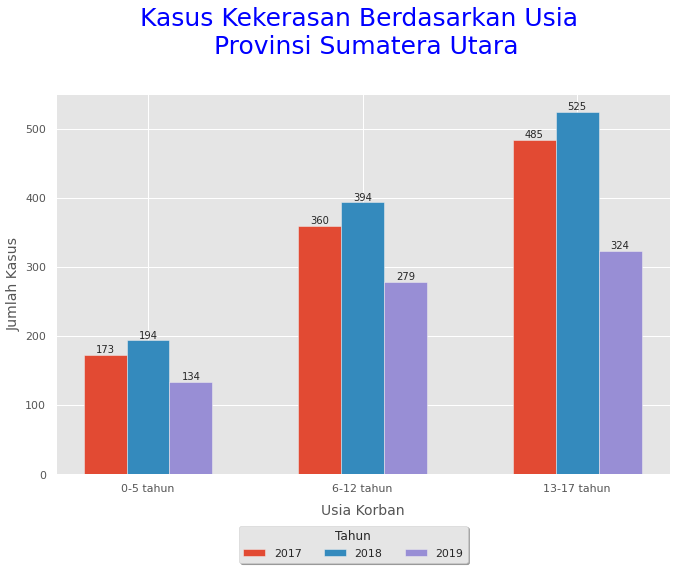

In [18]:
fig, ax = plt.subplots(figsize=(11,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
datagroup_age = np.transpose(datausia)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_age.columns):
  bar = plt.bar(x+(a*width), datagroup_age[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.2, labels=datagroup_age.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia \n Provinsi Sumatera Utara', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Usia Korban', fontsize=14, labelpad=10)
plt.legend(ncol=3, fancybox=True, shadow=True, bbox_to_anchor=(0.68,-0.12), title='Tahun')
plt.savefig('jumlah kasus berdasarkan usia.png')
plt.show()

In [19]:
datagroupjk=data[['Tahun','Jenis Kelamin','Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']]
datagroupjk['Total'] = datagroupjk[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']].sum(axis=1)
datagroupjk = datagroupjk.groupby(['Jenis Kelamin'])[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']].sum()
datagroupjk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Penelantaran,Kekerasan Lainnya
Jenis Kelamin,,,,,
Laki-laki,377,206,172,225,180
Perempuan,315,373,1305,228,219


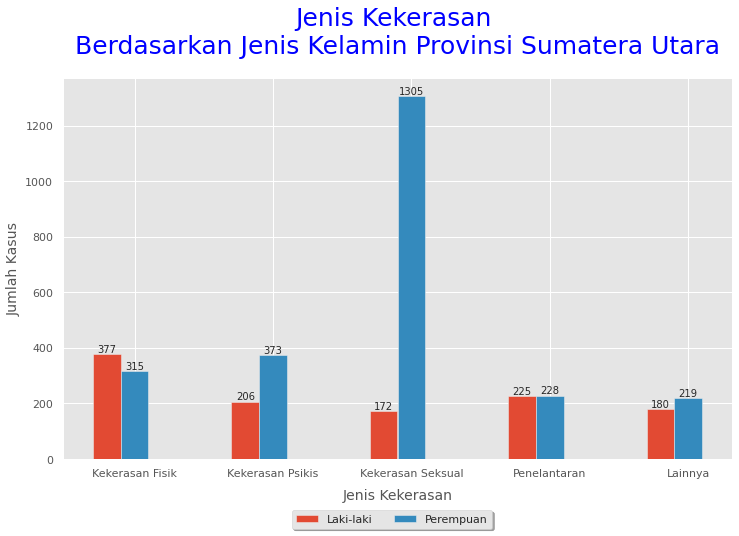

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
plt.style.use('ggplot')
labels = ['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Lainnya']
x = np.arange(5)
datagroup_jkt = np.transpose(datagroupjk)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_jkt.columns):
  bar = plt.bar(x+(a*width), datagroup_jkt[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.2, labels=datagroup_jkt.index)
ax.set_xticklabels(labels)
ax.set_title('Jenis Kekerasan \nBerdasarkan Jenis Kelamin Provinsi Sumatera Utara', fontsize=25, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Jenis Kekerasan', fontsize=14, labelpad=10)
plt.legend(ncol=3, fancybox=True, shadow=True, bbox_to_anchor=(0.65,-0.12))
plt.savefig('jumlah kasus jenis kekerasan berdasrkan jenis kelamin.png', bbox_tight=True)
plt.show()

In [21]:
data17 = data[data['Tahun'] == 2017]
usia17=data17[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia17 = usia17.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()


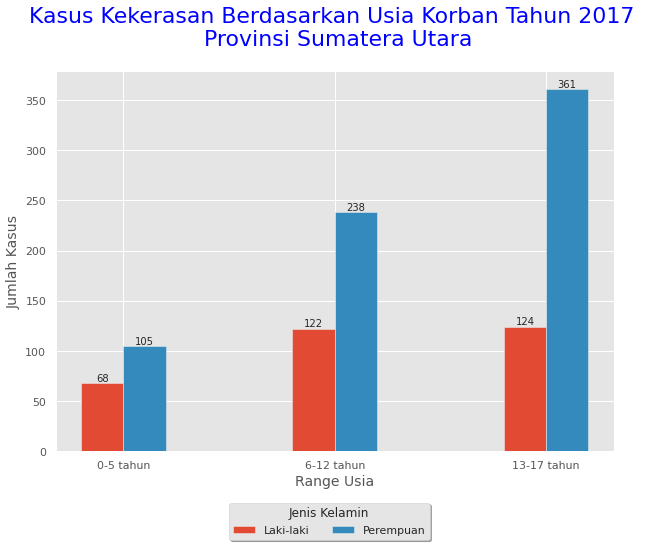

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia17t = np.transpose(usia17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia17t.columns):
  bar = plt.bar(x+(a*width), usia17t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia17t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2017 \n Provinsi Sumatera Utara', fontsize=22, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.68,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2017.png', bbox_tight=True)
plt.show()

In [23]:
data18 = data[data['Tahun'] == 2018]
usia18=data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia18 = usia18.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()
data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]

,Jenis Kelamin,0-5 tahun,6-12 tahun,13-17 tahun
66,Laki-laki,0,0,0
67,Perempuan,1,1,7
68,Laki-laki,2,9,2
69,Perempuan,2,8,5
70,Laki-laki,0,1,2
...,...,...,...,...
127,Perempuan,0,0,0
128,Laki-laki,2,3,8
129,Perempuan,14,22,43
130,Laki-laki,2,6,2


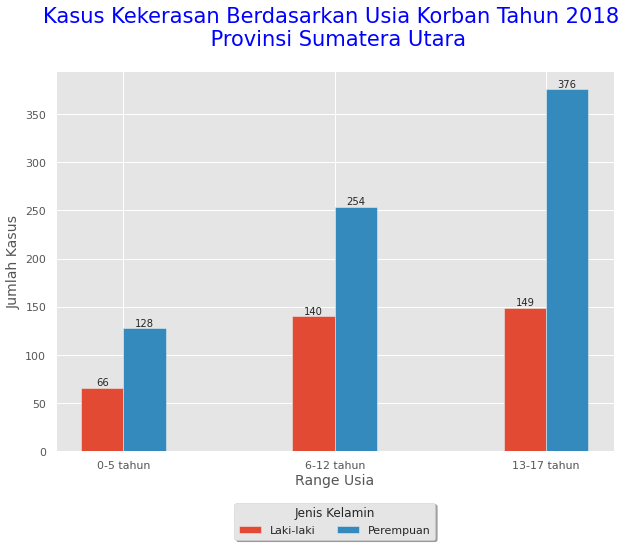

In [24]:
data18 = data[data['Tahun'] == 2018]
usia18=data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia18 = usia18.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia18t = np.transpose(usia18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia18t.columns):
  bar = plt.bar(x+(a*width), usia18t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia18t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2018 \n Provinsi Sumatera Utara', fontsize=21, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14, labelpad=3)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.69,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2018.png', bbox_tight=True)
plt.show()

In [25]:
data19 = data[data['Tahun'] == 2019]
usia19=data19[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia19 = usia19.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()

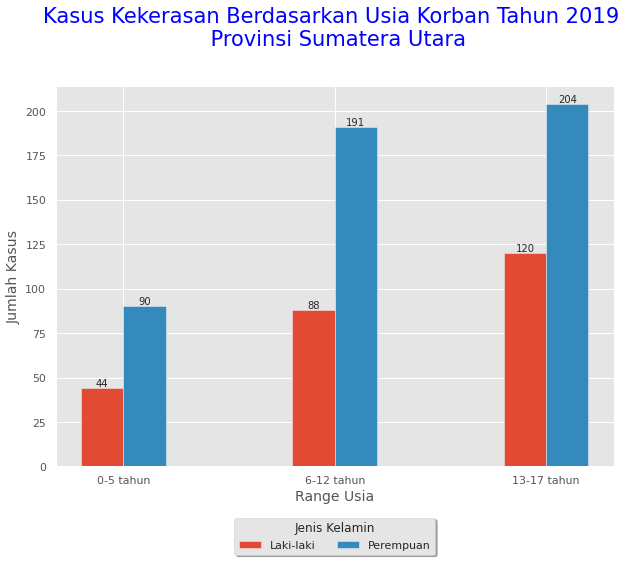

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia19t = np.transpose(usia19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia19t.columns):
  bar = plt.bar(x+(a*width), usia19t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia19t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2019 \n Provinsi Sumatera Utara', fontsize=21, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.69,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2019.png', bbox_tight=True)
plt.show()

In [27]:
datatempat17 = data[data['Tahun'] == 2017]
tempat17=datatempat17[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya']]
tempat17 = tempat17.groupby(['Jenis Kelamin'])[['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']].sum()

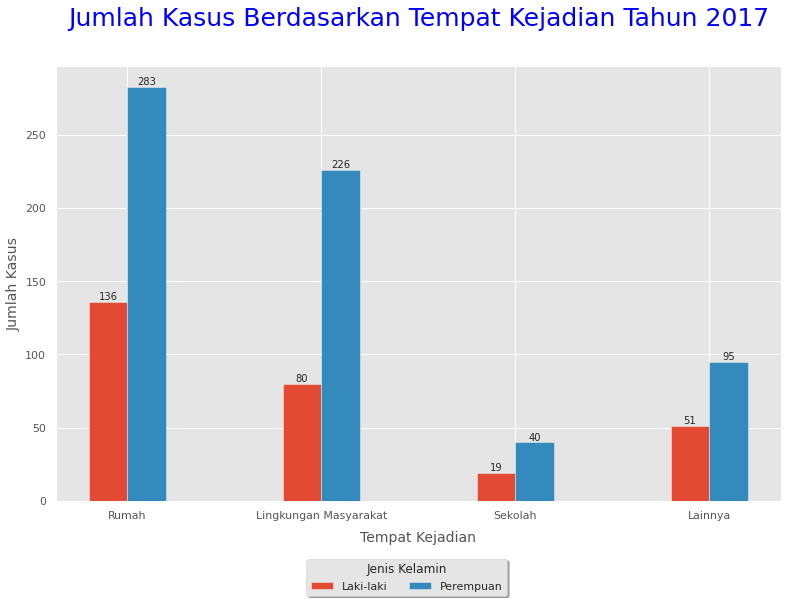

In [28]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']
x = np.arange(4)
tempat17_t = np.transpose(tempat17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat17_t.columns):
  bar = plt.bar(x+(a*width), tempat17_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat17_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2017', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [29]:
datatempat18 = data[data['Tahun'] == 2018]
tempat18=datatempat17[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya']]
tempat18 = tempat18.groupby(['Jenis Kelamin'])[['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']].sum()

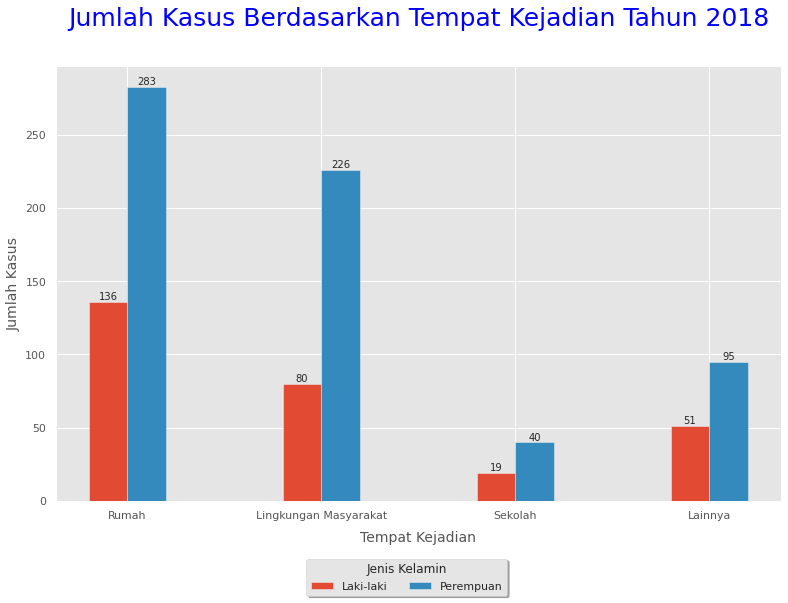

In [30]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']
x = np.arange(4)
tempat18_t = np.transpose(tempat18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat18_t.columns):
  bar = plt.bar(x+(a*width), tempat18_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat18_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2018', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [31]:
datatempat19 = data[data['Tahun'] == 2019]
tempat19=datatempat19[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya','Fasilitas Umum']]
tempat19 = tempat19.groupby(['Jenis Kelamin'])[['Rumah','Tempat Bekerja','Sekolah','Lainnya','Fasilitas Umum']].sum()

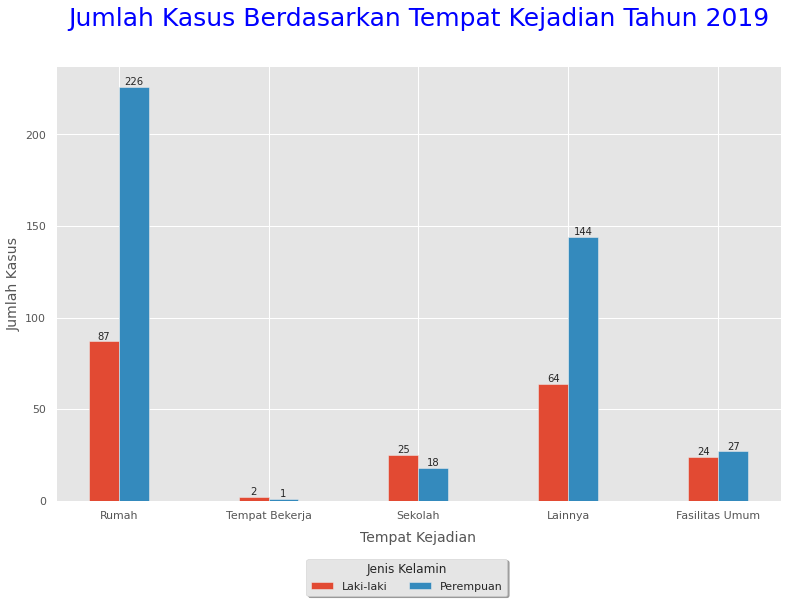

In [32]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Tempat Bekerja','Sekolah','Lainnya','Fasilitas Umum']
x = np.arange(5)
tempat19_t = np.transpose(tempat19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat19_t.columns):
  bar = plt.bar(x+(a*width), tempat19_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat19_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2019', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [33]:
datalayanan17 = data[data['Tahun'] == 2017]
layanan17=datalayanan17[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan17 = layanan17.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

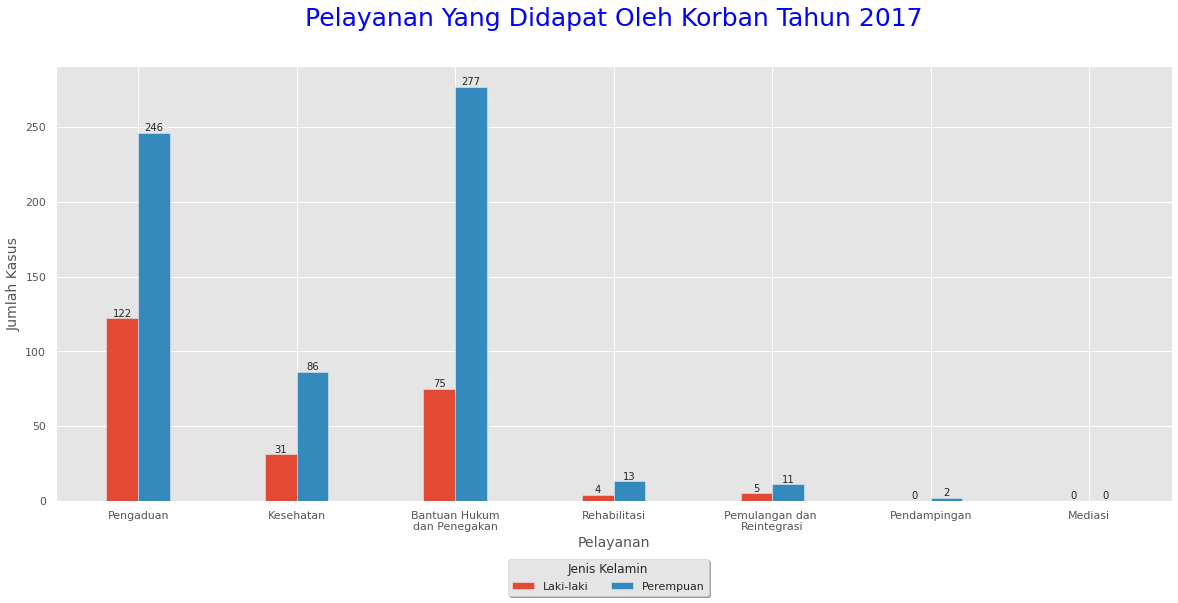

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Rehabilitasi','Pemulangan dan \nReintegrasi','Pendampingan','Mediasi']
x = np.arange(7)
layanan17_t = np.transpose(layanan17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan17_t.columns):
  bar = plt.bar(x+(a*width), layanan17_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan17_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2017', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

In [35]:
datalayanan18 = data[data['Tahun'] == 2018]
layanan18=datalayanan18[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan18 = layanan18.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

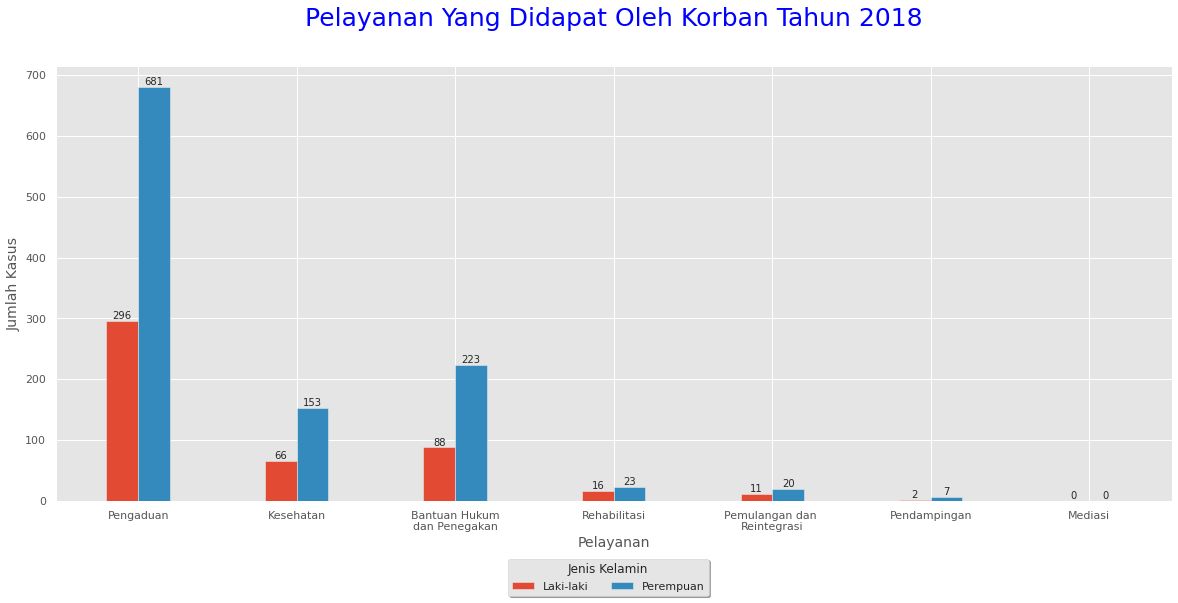

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Rehabilitasi','Pemulangan dan \nReintegrasi','Pendampingan','Mediasi']
x = np.arange(7)
layanan18_t = np.transpose(layanan18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan18_t.columns):
  bar = plt.bar(x+(a*width), layanan18_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan18_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2018', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

In [37]:
datalayanan19 = data[data['Tahun'] == 2019]
layanan19=datalayanan19[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan19 = layanan19.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

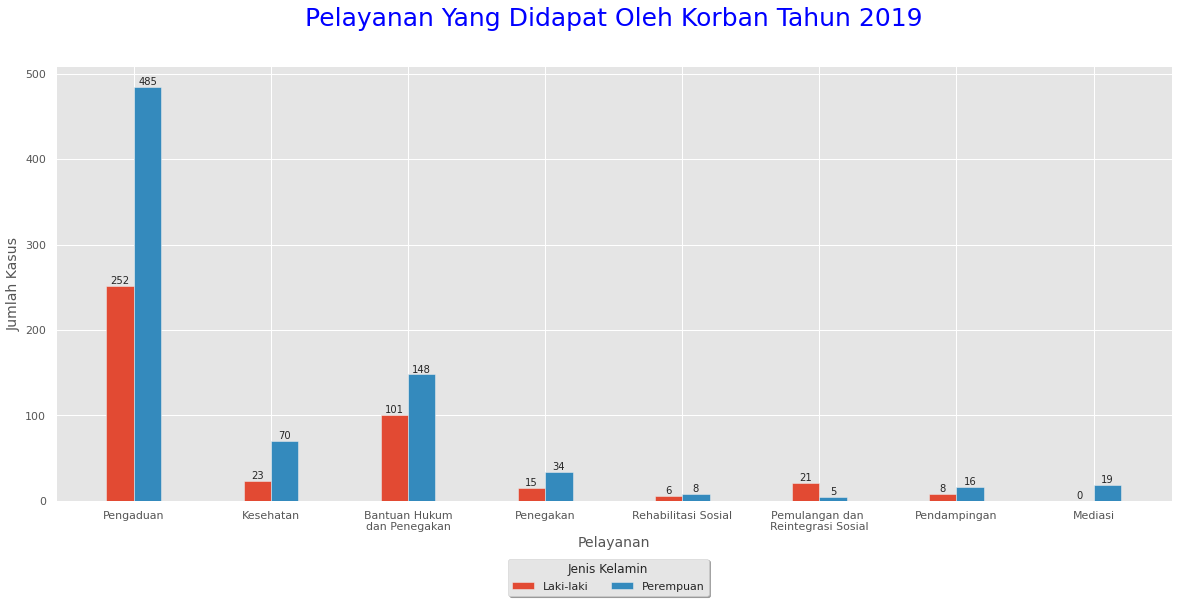

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan \nReintegrasi Sosial','Pendampingan','Mediasi']
x = np.arange(8)
layanan19_t = np.transpose(layanan19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan19_t.columns):
  bar = plt.bar(x+(a*width), layanan19_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan19_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2019', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

# Data Pre-Processing

## Data Cleaning

In [39]:
missing_values = data.isnull()

print('Check Missing Values:\n')
for column in missing_values.columns.values.tolist():
  print(column)
  print(missing_values[column].value_counts())
  print('')

Check Missing Values:

Tahun
False    198
Name: Tahun, dtype: int64

Kabupaten/Kota
False    198
Name: Kabupaten/Kota, dtype: int64

Kekerasan Fisik
False    198
Name: Kekerasan Fisik, dtype: int64

Kekerasan Psikis
False    198
Name: Kekerasan Psikis, dtype: int64

Kekerasan Seksual
False    198
Name: Kekerasan Seksual, dtype: int64

Eksploitasi
False    198
Name: Eksploitasi, dtype: int64

Trafficking
False    198
Name: Trafficking, dtype: int64

Penelantaran
False    198
Name: Penelantaran, dtype: int64

Kekerasan Lainnya
False    198
Name: Kekerasan Lainnya, dtype: int64

0-5 tahun
False    198
Name: 0-5 tahun, dtype: int64

6-12 tahun
False    198
Name: 6-12 tahun, dtype: int64

13-17 tahun
False    198
Name: 13-17 tahun, dtype: int64

Rumah
False    198
Name: Rumah, dtype: int64

Tempat Bekerja
False    198
Name: Tempat Bekerja, dtype: int64

Lingkungan Masyarakat
False    198
Name: Lingkungan Masyarakat, dtype: int64

Sekolah
False    198
Name: Sekolah, dtype: int64

Lainnya
Fal

In [40]:
from scipy import stats
datazscore = data.copy()
datazscore.drop(['Kabupaten/Kota','Jenis Kelamin','Rekan Kerja'], axis=1, inplace=True)

# Find the outliers using Z score
zscore = np.abs(stats.zscore(datazscore))
print('Nilai Zscore:\n',zscore)
print('\n')

threshold = 3
thres_zscore = zscore>3
loc = np.where(thres_zscore)
print('Lokasi Outliers:\n',loc)
print('Jumlah Outliers Pada Dataset:\n', thres_zscore.sum())

Nilai Zscore:
         Tahun  Kekerasan Fisik  Kekerasan Psikis  Kekerasan Seksual  \
0    1.224745         0.106373          0.450089           0.663528   
1    1.224745         0.738226          0.142256           1.649162   
2    1.224745         0.527608          0.627326           0.663528   
3    1.224745         0.314863          0.935159           0.218780   
4    1.224745         0.314863          0.450089           0.663528   
..        ...              ...               ...                ...   
193  1.224745         0.736099          0.450089           0.663528   
194  1.224745         0.525481          0.296173           0.485629   
195  1.224745         0.525481          0.319493           0.048069   
196  1.224745         0.106373          0.296173           0.396679   
197  1.224745         0.736099          0.450089           0.396679   

     Eksploitasi  Trafficking  Penelantaran  Kekerasan Lainnya  0-5 tahun  \
0       0.139047     0.135532      0.117517           0

## Encoding

In [41]:
encoder = LabelEncoder()
data['Kabupaten/Kota'] = encoder.fit_transform(data['Kabupaten/Kota'])
data['Jenis Kelamin'] = encoder.fit_transform(data['Jenis Kelamin'])
print('Data setelah LabelEncoder:')
data.head(10)

Data setelah LabelEncoder:


,Tahun,Kabupaten/Kota,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,...,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,2017,0,4,0,0,0,0,3,0,3,...,0,1,0,0,0,0,0,0,0,0
1,2017,0,7,2,26,0,0,1,1,1,...,0,1,1,0,0,1,1,0,0,1
2,2017,1,6,7,0,0,0,15,2,3,...,0,0,0,0,0,0,0,0,0,0
3,2017,1,2,9,5,0,0,10,5,1,...,0,3,0,4,0,0,1,0,0,1
4,2017,25,2,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
5,2017,25,1,1,5,0,0,1,0,4,...,0,4,0,0,0,0,0,0,0,1
6,2017,2,6,5,0,0,0,0,0,0,...,0,8,0,15,0,1,0,0,0,0
7,2017,2,1,7,17,0,0,0,1,4,...,0,15,7,47,0,0,0,0,0,1
8,2017,3,3,2,3,0,0,9,5,8,...,0,0,0,2,0,0,0,0,0,0
9,2017,3,4,2,27,0,0,5,5,2,...,0,2,0,1,0,0,0,0,0,1


# Data Transformation

## Feature Selection

In [42]:
data.head()

,Tahun,Kabupaten/Kota,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,...,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,2017,0,4,0,0,0,0,3,0,3,...,0,1,0,0,0,0,0,0,0,0
1,2017,0,7,2,26,0,0,1,1,1,...,0,1,1,0,0,1,1,0,0,1
2,2017,1,6,7,0,0,0,15,2,3,...,0,0,0,0,0,0,0,0,0,0
3,2017,1,2,9,5,0,0,10,5,1,...,0,3,0,4,0,0,1,0,0,1
4,2017,25,2,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [43]:
data = data.drop(['Kabupaten/Kota','Tahun','Kekerasan Lainnya','Lainnya'], axis=1)
datadrop=data.iloc[:,9:24]
data = data.drop(datadrop, axis=1)
data.head()

,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,0-5 tahun,6-12 tahun,13-17 tahun,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,4,0,0,0,0,3,3,1,4,1,0,0,0,0,0,0,0,0
1,7,2,26,0,0,1,1,6,28,1,1,0,0,1,1,0,0,1
2,6,7,0,0,0,15,3,2,2,0,0,0,0,0,0,0,0,0
3,2,9,5,0,0,10,1,2,2,3,0,4,0,0,1,0,0,1
4,2,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0


# Data Modelling

In [44]:
X = data.drop(['Jenis Kelamin'], axis=1)
y = data[['Jenis Kelamin']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [45]:
print('X_train shape :\n', X_train.shape)
print('X_test shape :\n', X_test.shape)
print('Baris X_train shape:\n', X_train.shape[0])
print('Kolom X_train shape:\n', X_train.shape[1])

print('Baris X_test shape:\n', X_test.shape[0])
print('Kolom X_test shape:\n', X_test.shape[1])

X_train shape :
 (158, 17)
X_test shape :
 (40, 17)
Baris X_train shape:
 158
Kolom X_train shape:
 17
Baris X_test shape:
 40
Kolom X_test shape:
 17


In [46]:
print('y_train shape :\n', y_train.shape)
print('y_test shape :\n', y_test.shape)
print('Baris y_train shape:\n', y_train.shape[0])
print('Baris y_train shape:\n', y_test.shape[0])

y_train shape :
 (158, 1)
y_test shape :
 (40, 1)
Baris y_train shape:
 158
Baris y_train shape:
 40


## Data Transformation (Normalization)

In [47]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

print('Normalisasi X_train 80%:\n', X_train_scaler)
print('Normalisasi X_test 20%:\n', X_test_scaler)

Normalisasi X_train 80%:
 [[0.         0.         0.07017544 ... 0.         0.         0.        ]
 [0.30434783 0.02173913 0.01754386 ... 0.         0.         0.        ]
 [0.26086957 0.         0.10526316 ... 0.         0.         0.        ]
 ...
 [0.17391304 0.13043478 0.03508772 ... 0.         0.         0.        ]
 [0.         0.         0.10526316 ... 0.         0.         0.        ]
 [0.         0.         0.03508772 ... 0.         0.         0.        ]]
Normalisasi X_test 20%:
 [[0.60869565 0.2173913  0.         0.25       0.         0.04166667
  0.         0.16666667 0.125      0.17073171 0.         0.0326087
  0.         0.09090909 0.         0.         0.        ]
 [0.08695652 0.02173913 0.21052632 0.         0.         0.10416667
  0.04166667 0.22916667 0.1875     0.26829268 0.         0.
  0.         0.         0.         0.         0.        ]
 [1.         1.08695652 0.05263158 0.         0.         0.54166667
  0.79166667 0.6875     0.45833333 0.01219512 0.         0

## Data Modelling (Implementation Algorithm)

### Split 80%:20%

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaler, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [49]:
gnbscore_train = gnb.score(X_train_scaler, y_train)
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnbscore_train))

gnbscore_test = gnb.score(X_test_scaler, y_test)
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnbscore_test))

scores = cross_val_score(gnb, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.65
Accuracy of Gaussian NB classifier on test set: 0.70
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [50]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.48734177 0.51265823]


In [51]:
print('Mean tiap feature: \n', gnb.theta_)
print('\nVariansi tiap feature: \n', gnb.sigma_)

Mean tiap feature: 
 [[0.14624506 0.03133823 0.0312144  0.         0.         0.03192641
  0.02272727 0.05844156 0.07575758 0.07285398 0.02806871 0.02103331
  0.00999001 0.01416765 0.02187286 0.01623377 0.        ]
 [0.1352657  0.07997853 0.21529131 0.01851852 0.02469136 0.05092593
  0.07073045 0.13220165 0.19212963 0.17073171 0.11071286 0.06910896
  0.02849003 0.04152637 0.02014295 0.03395062 0.01388889]]

Variansi tiap feature: 
 [[2.96029800e-02 3.20984840e-03 3.08285372e-03 4.00970259e-11
  4.00970259e-11 5.48548452e-03 2.05381743e-03 5.12985846e-03
  8.58934315e-03 1.56175361e-02 8.33413924e-03 3.21096431e-03
  3.12774143e-03 2.37521418e-03 1.52786740e-02 8.25919215e-03
  4.00970259e-11]
 [4.52285935e-02 2.68480847e-02 5.54853524e-02 1.35459534e-02
  1.79088554e-02 1.91936729e-02 2.17622494e-02 3.20340417e-02
  5.10759603e-02 5.86988933e-02 4.62979220e-02 3.08475946e-02
  1.97888005e-02 2.04161581e-02 4.21106678e-03 2.31529112e-02
  1.23456791e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
y_pred_gaussian = gnb.predict(X_test_scaler)
print('Angka kesalahan label point dari total %d points : %d' %(X_test_scaler.shape[0], (y_test.values.ravel() != y_pred_gaussian).sum()))

Angka kesalahan label point dari total 40 points : 12


In [53]:
y_pred_gaussian_ds = gnb.predict([[0.608696,0.217391,0,0.25,0,
                                   0.041667,0,0.166667,0.125,
                                   0.170732,0,0.032609,0,0.090909,
                                   0,0,0]])
print('Prediksi Data Sampel Pertama:', y_pred_gaussian_ds)

y_pred_gauss_ds2 = gnb.predict([[1,1.086957,0.052632,0,0,0.541667,
                                 0.791667,0.6875,0.458333,0.012195,
                                 0,0.01087,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', y_pred_gauss_ds2)

Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [1]


In [54]:
print('Prediksi seluruh data sampel:\n', y_pred_gaussian)
print('Seluruh data aktual:\n', y_test)

Prediksi seluruh data sampel:
 [1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1]
Seluruh data aktual:
      Jenis Kelamin
142              0
153              1
26               0
158              0
123              1
24               0
125              1
141              1
128              0
186              0
72               0
96               0
21               1
67               1
149              1
143              1
110              0
63               1
92               0
171              1
106              0
94               0
132              0
50               0
73               1
197              1
157              1
100              0
97               1
124              0
138              0
57               1
36               0
164              0
54               0
25               1
1                1
90               0
84               0
191              1


In [55]:
confusion_mat = confusion_matrix(y_test, y_pred_gaussian)
confusion_mat

array([[18,  4],
       [ 8, 10]])

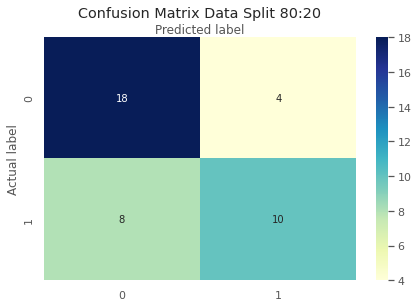

In [56]:
fig, ax = plt.subplots()
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 80:20', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusionmatriks 8020.png')
plt.show()

In [57]:
print('Pengujian Evaluasi Data Split 80:20')
print(classification_report(y_test, y_pred_gaussian))

Pengujian Evaluasi Data Split 80:20
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.71      0.56      0.63        18

    accuracy                           0.70        40
   macro avg       0.70      0.69      0.69        40
weighted avg       0.70      0.70      0.69        40



In [58]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5886
Test set score: 0.4500


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### Process of visualization the model

In [59]:
testpred = pd.DataFrame({'Nilai Test':y_test.values.ravel(),'Nilai Prediksi':y_pred_gaussian})

In [60]:
testpred[testpred['Nilai Prediksi']==1].count()

Nilai Test        14
Nilai Prediksi    14
dtype: int64

In [61]:
predtest = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [26,14], 'Nilai Test': ['0','1'],'Total Test':[22,18]}, index=[0,1])
predtestgroup = predtest.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup = predtest.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

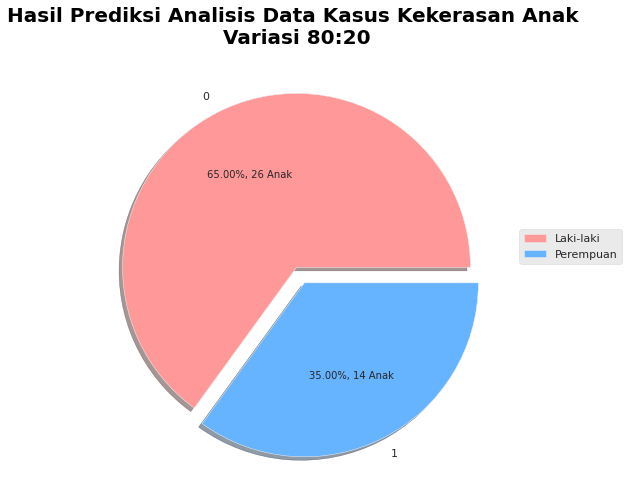

In [62]:
valuespred20 = predtestgroup['Total']
valuesact20 = pred_testgroup['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
piechart = ax.pie(predtestgroup['Total'], labels=predtestgroup['Nilai Prediksi'], 
          autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred20)/100 :.0f} Anak', explode=explode, shadow=True, colors=my_colors,
          startangle=0)

ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 80:20', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi data akhir 8020.png')
plt.show()

### Split 70%:30%

In [63]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.3, random_state=30)

In [64]:
print('X_train shape :\n', X_train30.shape)
print('X_test shape :\n', X_test30.shape)
print('Baris X_train shape :\n', X_train30.shape[0])
print('Kolom X_train shape :\n', X_train30.shape[1])

print('Baris X_test shape :\n', X_test30.shape[0])
print('Kolom X_test shape:\n', X_test30.shape[1])

X_train shape :
 (138, 17)
X_test shape :
 (60, 17)
Baris X_train shape :
 138
Kolom X_train shape :
 17
Baris X_test shape :
 60
Kolom X_test shape:
 17


In [65]:
print('y_train shape :\n', y_train30.shape)
print('y_test shape :\n', y_test30.shape)
print('Baris y_train :\n', y_train30.shape[0])
print('Kolom y_test :\n', y_test30.shape[0])

y_train shape :
 (138, 1)
y_test shape :
 (60, 1)
Baris y_train :
 138
Kolom y_test :
 60


In [66]:
scaler = MinMaxScaler()
X_train_scaler30 = scaler.fit_transform(X_train30)
X_test_scaler30 = scaler.transform(X_test30)

In [67]:
print('Normalisasi X_train 70%:\n', X_train_scaler30)
print('Normalisasi X_test 30%:\n', X_test_scaler30)

Normalisasi X_train 70%:
 [[0.05       0.02173913 0.0877193  ... 0.         0.         0.        ]
 [0.15       0.04347826 0.05263158 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.2        0.13043478 0.03508772 ... 0.         0.         0.        ]
 [0.         0.         0.10526316 ... 0.         0.         0.        ]
 [0.         0.         0.03508772 ... 0.         0.         0.        ]]
Normalisasi X_test 30%:
 [[0.7        0.2173913  0.         ... 0.         0.         0.        ]
 [0.1        0.02173913 0.21052632 ... 0.         0.         0.        ]
 [1.15       1.08695652 0.05263158 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.03508772 ... 0.         0.         0.        ]
 [0.45       0.08695652 0.07017544 ... 0.         0.         0.        ]
 [0.1        0.23913043 0.19298246 ... 2.375      0.         0.        ]]


In [68]:
from sklearn.naive_bayes import GaussianNB
gnb30 = GaussianNB()
gnb30.fit(X_train_scaler30, y_train30.values.ravel())

GaussianNB()

In [69]:
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnb30.score(X_train_scaler30, y_train30)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnb30.score(X_test_scaler30, y_test30)))

scores = cross_val_score(gnb30, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.64
Accuracy of Gaussian NB classifier on test set: 0.68
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [70]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb30.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.46376812 0.53623188]


In [71]:
print('Mean data latih 70%:', gnb30.theta_)
print('Varians data latih 70%:', gnb30.sigma_)

Mean data latih 70%: [[0.16015625 0.02887228 0.03042763 0.         0.         0.02376302
  0.02148438 0.06054687 0.06510417 0.07240854 0.03074597 0.01834239
  0.01201923 0.01704545 0.02539062 0.01953125 0.        ]
 [0.14662162 0.07256169 0.21716453 0.02027027 0.02702703 0.05067568
  0.07516892 0.13626126 0.19960586 0.18029005 0.11813426 0.07256169
  0.03118503 0.04422604 0.05067568 0.03716216 0.0152027 ]]
Varians data latih 70%: [[4.04827881e-02 2.79204115e-03 3.07058126e-03 4.51365259e-11
  4.51365259e-11 3.95870213e-03 2.35960223e-03 5.81487024e-03
  7.52088763e-03 1.74137186e-02 9.60684472e-03 3.15998277e-03
  3.73867423e-03 2.80862608e-03 1.81541443e-02 9.87243657e-03
  4.51365259e-11]
 [4.90764244e-02 2.08358074e-02 5.64057357e-02 1.47918189e-02
  1.95398101e-02 2.05175615e-02 2.35292039e-02 3.38329250e-02
  5.27989719e-02 6.29301666e-02 4.98995143e-02 3.33370846e-02
  2.15766703e-02 2.21673539e-02 2.57258949e-02 2.52237035e-02
  1.34935400e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
y_pred_gauss_ds30 = gnb30.predict([[0.85,0.130435,0.140351,1.25,
                                    0,0.208333,0.395833,0.4375,
                                    0.166667, 0.585366,0.290323,
                                    0.336957,0.384615,0.090909,0,0,0]])
print('Prediksi Data Sampel Pertama:', y_pred_gauss_ds30)

y_pred_ds2 = gnb30.predict([[0.15,0,0.526316,0,0,0,0.083333,0.416667,
                             0.1875,0.317073,0,0,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', y_pred_ds2)


Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [1]


In [73]:
y_pred_gauss_30_all = gnb30.predict(X_test_scaler30)
print('Prediksi keseluruhan data sampel 30%:\n', y_pred_gauss_30_all)
print('Data sampel 30% sebelum prediksi:\n', y_test30.values.ravel())

Prediksi keseluruhan data sampel 30%:
 [1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
Data sampel 30% sebelum prediksi:
 [0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0]


In [74]:
confusion_mat = confusion_matrix(y_test30, y_pred_gauss_30_all)
confusion_mat

array([[30,  5],
       [14, 11]])

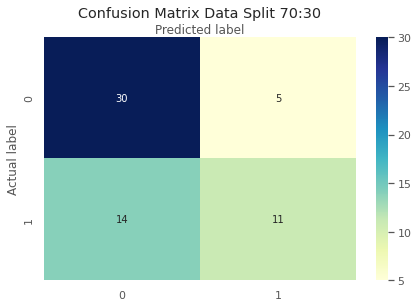

In [75]:
fig, ax = plt.subplots()
class_names=[1,2] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 70:30', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion matriks 7030.png')
plt.show()

In [76]:
print('Pengujian Evaluasi Data Split 70:30')
print(classification_report(y_test30, y_pred_gauss_30_all))

Pengujian Evaluasi Data Split 70:30
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.69      0.44      0.54        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.65        60
weighted avg       0.68      0.68      0.67        60



## Visualization the model with data train 70%

In [77]:
Predict30 = pd.DataFrame(y_pred_gauss_30_all, columns=['Predict'])
Predict30['Validation'] = y_test30.values.ravel()

In [78]:
Predict30[Predict30['Predict']==1].count()

Predict       16
Validation    16
dtype: int64

In [79]:
predtest30 = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [44,16], 'Nilai Test': ['0','1'],'Total Test':[35,25]}, index=[0,1])
predtestgroup30 = predtest30.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup30 = predtest30.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

In [80]:
predtestgroup30

,Nilai Prediksi,Total
0,0,44.0
1,1,16.0


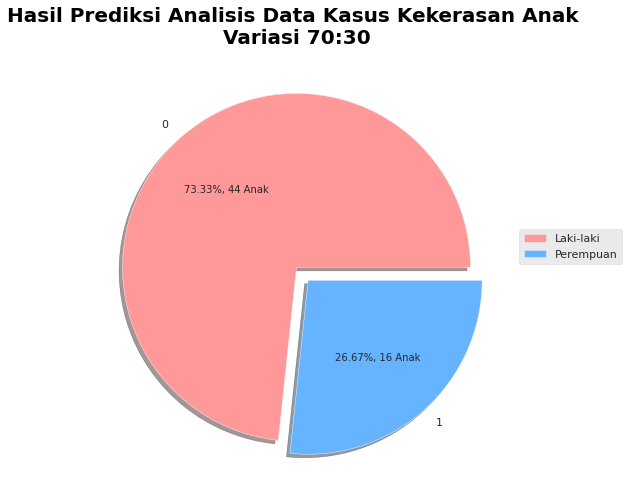

In [81]:
valuespred30 = predtestgroup30['Total']
valuesact30 = pred_testgroup30['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
ax.pie(predtestgroup30['Total'], labels=predtestgroup30['Nilai Prediksi'], 
         autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred30)/100 :.0f} Anak', explode=explode, shadow=True, colors=my_colors,
          startangle=0)
ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 70:30', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi prediksi 7030.png')
plt.show()

## Split 60%:40%

In [83]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(X, y, test_size=0.4, random_state=30)

In [84]:
print('X_train :\n', X_train40.shape)
print('X_test :\n', X_test40.shape)
print('Baris X_train :\n', X_train40.shape[0])
print('Kolom X_train :\n', X_train40.shape[1])

print('Baris X_test :\n', X_test40.shape[0])
print('Kolom X_test :\n', X_test40.shape[1])

X_train :
 (118, 17)
X_test :
 (80, 17)
Baris X_train :
 118
Kolom X_train :
 17
Baris X_test :
 80
Kolom X_test :
 17


In [85]:
print('y_train :\n', y_train40.shape)
print('y_test :\n', y_test40.shape)
print('Baris y_train :\n', y_train40.shape[0])
print('Baris y_test :\n', y_test40.shape[0])

y_train :
 (118, 1)
y_test :
 (80, 1)
Baris y_train :
 118
Baris y_test :
 80


In [86]:
scaler = MinMaxScaler()
X_train_scaler40 = scaler.fit_transform(X_train40)
X_test_scaler40 = scaler.transform(X_test40)

In [87]:
print('Normalisasi X_train 60%:\n', X_train_scaler40)
print('Normalisasi X_test 40%:\n', X_test_scaler40)

Normalisasi X_train 60%:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.4        0.         0.53846154 ... 0.         0.         0.        ]
 [0.8        0.02173913 0.11538462 ... 0.         0.         0.        ]
 ...
 [0.2        0.13043478 0.03846154 ... 0.         0.         0.        ]
 [0.         0.         0.11538462 ... 0.         0.         0.        ]
 [0.         0.         0.03846154 ... 0.         0.         0.        ]]
Normalisasi X_test 40%:
 [[0.7        0.2173913  0.         ... 0.         0.         0.        ]
 [0.1        0.02173913 0.23076923 ... 0.         0.         0.        ]
 [1.15       1.08695652 0.05769231 ... 0.         0.         0.        ]
 ...
 [0.85       0.45652174 1.09615385 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.1        0.02173913 0.13461538 ... 0.         0.         0.        ]]


In [88]:
from sklearn.naive_bayes import GaussianNB
gnb40 = GaussianNB()
gnb40.fit(X_train_scaler40, y_train40.values.ravel())

GaussianNB()

In [89]:
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnb40.score(X_train_scaler40, y_train40)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnb40.score(X_test_scaler40, y_test40)))

scores = cross_val_score(gnb40, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.64
Accuracy of Gaussian NB classifier on test set: 0.69
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [90]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb40.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.44915254 0.55084746]


In [91]:
print('Mean tiap feature: \n', gnb40.theta_)
print('\nVariansi tiap feature: \n', gnb40.sigma_)

Mean tiap feature: 
 [[0.16509434 0.02378999 0.03374456 0.         0.         0.03396226
  0.01926101 0.05699686 0.07301066 0.08301887 0.03530128 0.02112387
  0.01451379 0.02058319 0.0259434  0.02358491 0.        ]
 [0.13384615 0.06889632 0.23372781 0.02307692 0.03076923 0.06102564
  0.06826923 0.12948718 0.19632107 0.17       0.10521092 0.06755853
  0.03550296 0.04055944 0.03076923 0.02884615 0.01730769]]

Variansi tiap feature: 
 [[4.56212176e-02 1.60973274e-03 3.22241911e-03 4.37188663e-11
  4.37188663e-11 9.03524390e-03 2.32326158e-03 4.39188525e-03
  9.47131187e-03 2.11503204e-02 1.13978816e-02 3.74690188e-03
  4.47842000e-03 3.31873057e-03 2.08481667e-02 1.18258277e-02
  4.37188663e-11]
 [3.82390533e-02 2.05550274e-02 5.87759533e-02 1.67751480e-02
  2.21301776e-02 2.28912558e-02 2.10137246e-02 3.14435405e-02
  4.46265702e-02 5.27826924e-02 3.88786336e-02 3.01966421e-02
  2.44109100e-02 1.95882440e-02 1.10724853e-02 1.76775148e-02
  1.53254438e-02]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
predict_40ds = gnb40.predict([[0.9,0.26087,0.75,0,0,1.6,0.625,
                               0.645833,1.043478, 1.025,0.677419,
                               0.75,0,0.636364,0.25,0,0]])
print('Prediksi Data Sampel Pertama:', predict_40ds)

predicted = gnb40.predict([[0.5,0.065217,0.403846,0,0,0.033333,
                            0.083333,0.104167,0.108696, 0.0625,
                            0,0,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', predicted)


Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [0]


In [93]:
y_pred_gauss_40_all = gnb40.predict(X_test_scaler40)

In [94]:
print('Prediksi data sampel 40% :\n', y_pred_gauss_40_all)
print('Data sampel 40% sebelum diprediksi:\n', y_test40.values.ravel())

Prediksi data sampel 40% :
 [1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
Data sampel 40% sebelum diprediksi:
 [0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 0 0 1 0 1]


In [95]:
confusion_mat40 = confusion_matrix(y_test40, y_pred_gauss_40_all)
confusion_mat40

array([[42,  4],
       [21, 13]])

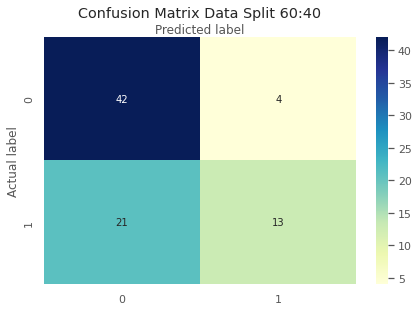

In [96]:
fig, ax = plt.subplots()
class_names=[1,2] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat40), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 60:40', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix 6040.png')
plt.show()

In [97]:
print('Pengujian Evaluasi Data Split 60:40')
print(classification_report(y_test40, y_pred_gauss_40_all))

Pengujian Evaluasi Data Split 60:40
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        46
           1       0.76      0.38      0.51        34

    accuracy                           0.69        80
   macro avg       0.72      0.65      0.64        80
weighted avg       0.71      0.69      0.66        80



## visualization the model 

In [98]:
testpred40 = pd.DataFrame({'Nilai Test':y_test40.values.ravel(),'Nilai Prediksi':y_pred_gauss_40_all})

In [99]:
testpred40[testpred40['Nilai Prediksi']==1].count()

Nilai Test        17
Nilai Prediksi    17
dtype: int64

In [100]:
predtest40 = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [63,17], 'Nilai Test': ['0','1'],'Total Test':[46,34]}, index=[0,1])
predtestgroup40 = predtest40.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup40 = predtest40.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

In [101]:
predtestgroup40

,Nilai Prediksi,Total
0,0,63.0
1,1,17.0


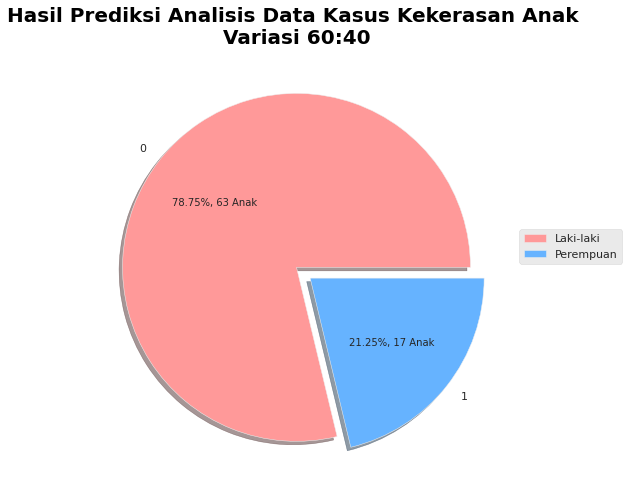

In [102]:
valuespred40 = predtestgroup40['Total']
valuesact40 = pred_testgroup40['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
ax.pie(predtestgroup40['Total'], labels=predtestgroup40['Nilai Prediksi'], 
          autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred40)/100 :.0f} Anak', explode=explode, shadow=True, colors = my_colors,
          startangle=0)
ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 60:40', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi 6040.png')
plt.show()